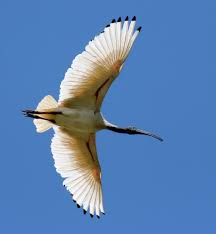

bird: 0.986160
animal: 0.957238
vertebrate: 0.911309
ciconiiformes: 0.844595
flight: 0.832813
heron: 0.703645
fauna: 0.666651
animal migration: 0.638720


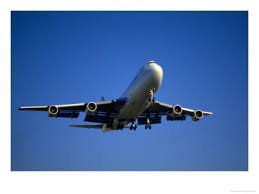

airplane: 0.961377
vehicle: 0.941716
aircraft: 0.921717
military aircraft: 0.879346
air force: 0.821796
airliner: 0.807591
flight: 0.775227
airline: 0.757139
takeoff: 0.738246
bomber: 0.717826


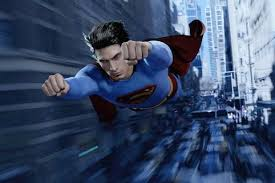

superman: 0.900000
comics: 0.532028
jumping: 0.519716


In [1]:
from IPython.display import display, Image
import base64
from googleapiclient import discovery
from oauth2client.client import GoogleCredentials
import json
import os, sys

# Setup
DISCOVERY_URL='https://{api}.googleapis.com/$discovery/rest?version={apiVersion}'
imagepath = './images/labels/'
dirs = os.listdir( imagepath )

"""Run a label request on a single image"""

#Credentials need to be sorted out initially. See Google documentation on this. 
credentials = GoogleCredentials.from_stream('CloudVisionPrj-3b7fedb71edc.json')
service = discovery.build('vision', 'v1', credentials=credentials,
                          discoveryServiceUrl=DISCOVERY_URL)

for file in dirs:
    imagefile = imagepath + file
    display(Image(filename=imagefile))

    with open(imagefile, 'rb') as image:

        #base64 encode for the request
        image_content = base64.b64encode(image.read())
        service_request = service.images().annotate(body={
            'requests': [{
                'image': {
                    'content': image_content.decode('UTF-8')
                },
                'features': [{
                    'type': 'LABEL_DETECTION',  #type of detection
                    'maxResults': 10
                }]
            }]
        })

        response = service_request.execute()
        # Extract the description
        for label in response['responses'][0]['labelAnnotations']:
            print label['description'] + ": %f"  %label['score']
